In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
#%matplotlib notebook
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2025-03-26 19:14:47.691525: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-26 19:14:48.047255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-26 19:14:48.777117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC', dlmedblue='#4285F4')

In [3]:
def plt_softmax(my_softmax):
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    plt.subplots_adjust(bottom=0.35)

    axz0 = fig.add_axes([0.15, 0.10, 0.30, 0.03]) # [left, bottom, width, height]
    axz1 = fig.add_axes([0.15, 0.15, 0.30, 0.03])
    axz2 = fig.add_axes([0.15, 0.20, 0.30, 0.03])
    axz3 = fig.add_axes([0.15, 0.25, 0.30, 0.03])

    z3 = Slider(axz3, 'z3', 0.1, 10.0, valinit=4, valstep=0.1)
    z2 = Slider(axz2, 'z2', 0.1, 10.0, valinit=3, valstep=0.1)
    z1 = Slider(axz1, 'z1', 0.1, 10.0, valinit=2, valstep=0.1)
    z0 = Slider(axz0, 'z0', 0.1, 10.0, valinit=1, valstep=0.1)

    z = np.array(['z0','z1','z2','z3'])
    bar = ax[0].barh(z, height=0.6, width=[z0.val,z1.val,z2.val,z3.val], left=None, align='center')
    bars = bar.get_children()
    ax[0].set_xlim([0,10])
    ax[0].set_title("z input to softmax")

    a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
    anames = np.array(['a0','a1','a2','a3'])
    sbar = ax[1].barh(anames, height=0.6, width=a, left=None, align='center',color=dlc["dldarkred"])
    sbars = sbar.get_children()
    ax[1].set_xlim([0,1])
    ax[1].set_title("softmax(z)")

    def update(val):
        bars[0].set_width(z0.val)
        bars[1].set_width(z1.val)
        bars[2].set_width(z2.val)
        bars[3].set_width(z3.val)
        a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
        sbars[0].set_width(a[0])
        sbars[1].set_width(a[1])
        sbars[2].set_width(a[2])
        sbars[3].set_width(a[3])

        fig.canvas.draw_idle()

    z0.on_changed(update)
    z1.on_changed(update)
    z2.on_changed(update)
    z3.on_changed(update)

    plt.show()
 

In [4]:
def my_softmax(z):
    ez = np.exp(z)          # Element-wise exponential
    sm = ez/np.sum(ez)
    return(sm)

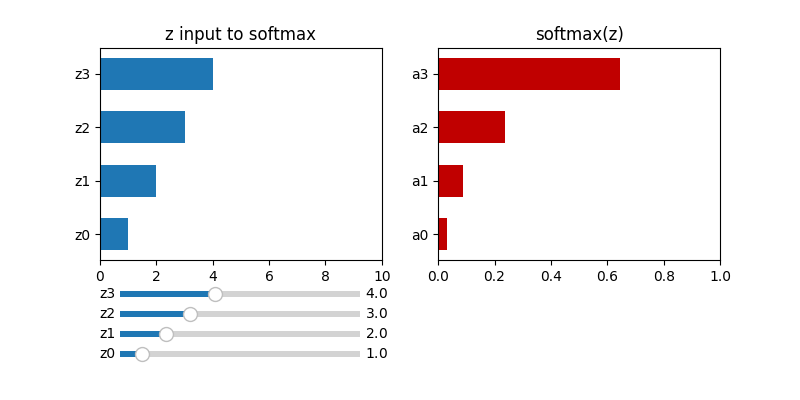

In [6]:
plt.close("all")
plt_softmax(my_softmax)

In [12]:
import matplotlib
import ipympl
print("matplot: ", matplotlib.__version__)
print("ipympl:", ipympl.__version__)

matplot:  3.10.1
ipympl: 0.9.7
